Name: Darshan Rajesh Tina
    
Andrew ID:dtina


### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law 



In [229]:
import glob
import time
test = glob.glob('./HW1_Dataset/*.txt')
t0 = time.time()
# Inserts data of each file into a list
# Stores each created list into a parent list t
# The time function is just used to see how much time it takes for this block of code to run
t = []
for i in test:
    with open(i,encoding='utf-8') as f:
        t += [x for x in f]
print("Took: " + str(time.time() - t0) + "s")

Took: 2.7296767234802246s


In [230]:
len(t)

1368166

In [231]:
import spacy

In [232]:
nlp = spacy.load('en',disable=['ner', 'parser', 'tagger'])

In [233]:
nlp.max_length = 500000000000000

In [234]:
#print(len(t) / 100. * 0.04 / 60)
# Converts the corpus of text into a string where each element in list t is separated by a space 
str_t = " ".join(t)
str_t = str_t[1:]

In [235]:
#str_t = str_t[:1000000]

In [236]:
parsed_text = nlp(str_t)

In [237]:
# Counts the occurence of each word in the corpus
# Stores the count of each unique word in the dictionary
dummy={}
import re
for token in parsed_text:
    original_tok = token.lemma_
    
    if original_tok not in dummy:
        if re.match('[a-zA-Z]+$',original_tok):
            #lemma = token.lemma_.lower()    
            dummy[original_tok] = 1
    else:
        dummy[original_tok] += 1

In [238]:
# Sorting the dictionary on the count 
from operator import itemgetter
dummy_sort = sorted(dummy.items(),key = itemgetter(1),reverse=True)

In [239]:
x = []
y = []
for i in dummy_sort:
    x.append(i[0])
    y.append(i[1])

In [240]:
for i in range(1,51):
    print('Rank:',i,'Word:',x[i-1],'Frequency:',y[i-1])

Rank: 1 Word: the Frequency: 648221
Rank: 2 Word: be Frequency: 427198
Rank: 3 Word: and Frequency: 394399
Rank: 4 Word: of Frequency: 378295
Rank: 5 Word: a Frequency: 337297
Rank: 6 Word: to Frequency: 314597
Rank: 7 Word: in Frequency: 192739
Rank: 8 Word: I Frequency: 188246
Rank: 9 Word: have Frequency: 186525
Rank: 10 Word: that Frequency: 161248
Rank: 11 Word: it Frequency: 113563
Rank: 12 Word: not Frequency: 109370
Rank: 13 Word: he Frequency: 108068
Rank: 14 Word: his Frequency: 103577
Rank: 15 Word: with Frequency: 97311
Rank: 16 Word: you Frequency: 96055
Rank: 17 Word: for Frequency: 85044
Rank: 18 Word: my Frequency: 67638
Rank: 19 Word: this Frequency: 66436
Rank: 20 Word: her Frequency: 66397
Rank: 21 Word: at Frequency: 60422
Rank: 22 Word: on Frequency: 59621
Rank: 23 Word: do Frequency: 59514
Rank: 24 Word: him Frequency: 58621
Rank: 25 Word: by Frequency: 58315
Rank: 26 Word: say Frequency: 57996
Rank: 27 Word: me Frequency: 57913
Rank: 28 Word: which Frequency: 571

In [241]:
import pandas as pd

In [242]:
df = pd.DataFrame()

In [243]:
# Converted to a dataframe for better readability
df['Rank'] = list(range(1,len(x)+1))
df['Word'] = x
df['Frequency'] = y
df1 = df.set_index('Rank')
print('The 50 most frequent words are \n',df1[:50])

The 50 most frequent words are 
        Word  Frequency
Rank                  
1       the     648221
2        be     427198
3       and     394399
4        of     378295
5         a     337297
6        to     314597
7        in     192739
8         I     188246
9      have     186525
10     that     161248
11       it     113563
12      not     109370
13       he     108068
14      his     103577
15     with      97311
16      you      96055
17      for      85044
18       my      67638
19     this      66436
20      her      66397
21       at      60422
22       on      59621
23       do      59514
24      him      58621
25       by      58315
26      say      57996
27       me      57913
28    which      57185
29      all      54975
30      but      54373
31      The      51618
32     much      49285
33     they      48283
34     from      47775
35       or      44776
36     will      43240
37       so      41933
38      can      41622
39      she      41240
40      And      40296
4

In [244]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



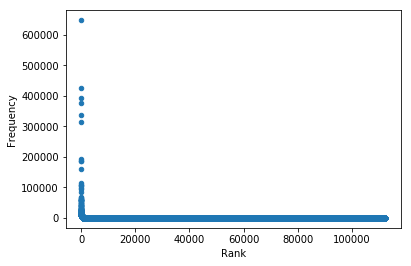

In [245]:
# Raw scatter plot
df.plot.scatter(x='Rank',y='Frequency')

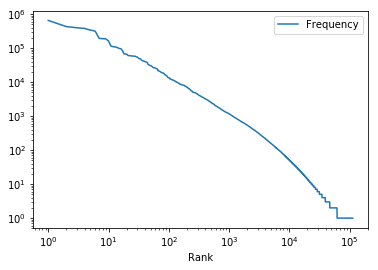

In [246]:
# Log-log plot
df.plot(x='Rank',y='Frequency',loglog=True)

In [247]:
print(df.head())
print('\n Dividing most occuring words frequency by the second most occuring frequency\n',round(648221/427198))

   Rank Word  Frequency
0     1  the     648221
1     2   be     427198
2     3  and     394399
3     4   of     378295
4     5    a     337297

 Dividing most occuring words frequency by the second most occuring frequency
 2


In [248]:
#Probability of drawing one of the 4 most frequent words
print('Probability of drawing one of the 4 most frequent words: ')
testing = df[df['Rank']<5]
answer1 = sum(testing['Frequency'])/sum(df['Frequency'])
print(answer1)

#Probability of drawing one of the 50 most frequent words 
print('Probability of drawing one of the 50 most frequent words: ')
testing = df[df['Rank']<51]
answer2 = sum(testing['Frequency'])/sum(df['Frequency'])
print(answer2)


Probability of drawing one of the 4 most frequent words: 
0.15296302212613877
Probability of drawing one of the 50 most frequent words: 
0.45646912082263913


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [249]:
# Using a dataframe testing to check for words 
# with frequency equal to one
print("Occur only once: ")
testing = df[df['Frequency']==1]
ans = len(testing)/len(df)
print(ans)

# Creating a dataframe only for those words that occur less than 10 times
print("Occur fewer than 10 times: ")
testing = df[df['Frequency']<10]
answ = len(testing)/len(df)
print(answ)

Occur only once: 
0.44965528298861634
Occur fewer than 10 times: 
0.7852689148985446


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) 


In [250]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Darshan\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [251]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

In [252]:
# Counts the number of entities associated with each labels
for i in reuters_nlp:
    for x in i.ents:
        if x.label_ not in label_counter:
            label_counter[x.label_] = 1
        else:
            label_counter[x.label_] +=1

<Figure size 720x360 with 0 Axes>

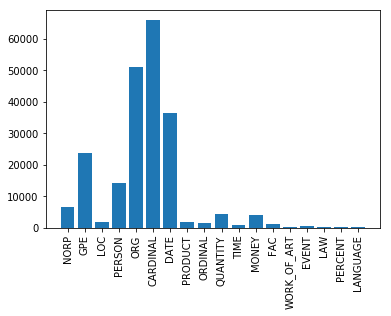

<Figure size 720x360 with 0 Axes>

In [253]:
# Plots the entity labels to its associated number of entites 
plt.bar(label_counter.keys(),label_counter.values())
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

In [254]:
org={}
testing_org = []
testing_gpe = []
gpe={}
gpe_opec_co = {}

#org_dummy is used for adding one to the ORG entity value if it is found in the article
#gpe_dummy is used for adding one to the GPE entity value if it is found in the article

for i in reuters_nlp:
    org_dummy = {}
    gpe_dummy = {}
    for x in i.ents:
        new = x.lemma_.lower()
        if(x.label_=='ORG'):
            if new not in org:
                org[new] = 0
                testing_org.append(x.label_)
            org_dummy[new] = 1
        if(x.label_=='GPE'):
            if new not in gpe:
                gpe[new] = 0
                gpe_opec_co[new] = 0
                testing_gpe.append(x.label_)
            gpe_dummy[new]=1
    for j in org: # Adds one for each article
        if j in org_dummy:
            org[j] += org_dummy[j]
    for j in gpe:
        if j in gpe_dummy: # Adds one for each article
            gpe[j] += gpe_dummy[j]
    #    gpe_opec_co is the dictionary for counting the number of co-occurences with entity 'opec' 
    for j in org_dummy:
        if j=='opec':
            for k in gpe_dummy:
                gpe_opec_co[k] += 1
        

In [255]:
import pandas as pd
# Dataframe for entities of label ORG
org_df = pd.DataFrame()
org_df['Entity'] = org.keys()
org_df['Frequency'] = org.values()
org_df = org_df.sort_values(['Frequency'],ascending=False)
org_df['Rank'] = list(range(1,len(org_df)+1))
org_df = org_df.set_index('Rank')

# Dataframe for entities of label GPE
gpe_df = pd.DataFrame()
gpe_df['Entity'] = gpe.keys()
gpe_df['Frequency'] = gpe.values()
gpe_df = gpe_df.sort_values(['Frequency'],ascending=False)
gpe_df['Rank'] = list(range(1,len(gpe_df)+1))
gpe_df = gpe_df.set_index('Rank')


In [256]:
print('Top 10 frequently occured entities with label ORG \n',org_df[:10])

Top 10 frequently occured entities with label ORG 
                                       Entity  Frequency
Rank                                                   
1                                        avg        583
2                                    reuters        445
3     the securities and exchange commission        246
4                                         ec        240
5                                       usda        226
6                                        fed        220
7                                        net        203
8                                   treasury        183
9            the u.s. agriculture department        170
10                                  congress        139


In [257]:
print('Top 10 frequently occured entities with label GPE \n',gpe_df[:10])

Top 10 frequently occured entities with label GPE 
                  Entity  Frequency
Rank                              
1                  u.s.       1666
2                   shr        690
3                 japan        588
4     the united states        375
5                  u.k.        309
6                canada        291
7              new york        271
8            washington        240
9          west germany        234
10               london        212


In [267]:
# Frequency of only those entites that are present in the co-occurence dictionary
total = []
for i in gpe_opec_co.keys():
    total += list(gpe_df[gpe_df['Entity']==i].Frequency)

# Data frame for Co-occurence values 
gpe_co_opec_df = pd.DataFrame()
gpe_co_opec_df['Entity'] = gpe_opec_co.keys()
gpe_co_opec_df['Co-Occur'] = gpe_opec_co.values()
gpe_co_opec_df['Frequency'] = total
gpe_co_opec_df = gpe_co_opec_df.sort_values(by=['Co-Occur'],ascending=False)
gpe_co_opec_df['Rank'] = list(range(1,len(gpe_co_opec_df)+1))
gpe_co_opec_df = gpe_co_opec_df.set_index('Rank')

test_df = pd.DataFrame(gpe_co_opec_df.sort_values(by='Frequency',ascending=False))
test_df.head()

,Entity,Co-Occur,Frequency
Rank,,,
1,u.s.,40,1666
1510,shr,0,690
13,japan,9,588
15,the united states,8,375
28,u.k.,4,309


In [272]:
# Calculating the PMI without filtering the data
no_filter_test = pd.DataFrame(test_df)
import math
x = list((no_filter_test['Co-Occur']/len(reuters_nlp))
         /((no_filter_test['Frequency']/len(reuters_nlp))
            *(org_df[org_df['Entity']=='opec']['Frequency'].values[0]/len(reuters_nlp))))
pmi = [math.log2(i) if i>=1 else 0 for i in x ]

no_filter_test['PMI'] = pmi
no_filter_test = no_filter_test.sort_values(by=['PMI'],ascending=False)
no_filter_test[:50]
#Here we can thus see, an overestimated relationship b/w entity opec and low occuring entities

,Entity,Co-Occur,Frequency,PMI
Rank,,,,
78,gabon on africa have,1,1,6.514497
88,l.f.,1,1,6.514497
108,doha,1,1,6.514497
102,saudi arabia 's,1,1,6.514497
98,aguarico,1,1,6.514497
96,ecaudor,1,1,6.514497
65,discussion,1,1,6.514497
92,lichtblau,1,1,6.514497
67,nazir,1,1,6.514497


In [262]:
# Sorted the values of co-occurence data frame i.e. test_df on basis of frequency
# Created a data frame from the top 100 values of test _df 
new_filter_test = pd.DataFrame(test_df[:100])


# Reason for doing that:
# If we directly without sorting use whatever data we have to compute the pmi
# then this results in overestimating the relation of low occuring words with the entity of interest i.e. opec
# For example if frequency of a is 1 and frequency of a co-occuring with opec is 1 then PMI of a is greater than
# that of b where frequency of b is say 100 and frequency of b co-occuring with opec is 89

# To avoid this skew in the results, filtering out of the low frequency words was done

# Calculation of PMI for only top 100 occuring GPE entities with regard to entity 'opec' with label 'ORG'
import math
x = list((new_filter_test['Co-Occur']/len(reuters_nlp))
         /((new_filter_test['Frequency']/len(reuters_nlp))
            *(org_df[org_df['Entity']=='opec']['Frequency'].values[0]/len(reuters_nlp))))
pmi = [math.log2(i) if i>=1 else 0 for i in x ]

new_filter_test['PMI'] = pmi
new_filter_test = new_filter_test.sort_values(by=['PMI'],ascending=False)
new_filter_test = new_filter_test.reset_index()

new_filter_test = new_filter_test.drop('Rank',axis=1)
new_filter_test['Rank'] = list(range(1,len(new_filter_test)+1))
new_filter_test = new_filter_test.set_index('Rank')

In [263]:
new_filter_test[:50][['Entity','PMI']]

,Entity,PMI
Rank,,
1,qatar,5.720948
2,saudi arabia,5.350110
3,ecuador,5.332293
4,kuwait,5.181921
5,the united arab emirates,5.115947
6,venezuela,5.047371
7,algeria,4.011996
8,iraq,3.990935
9,norway,3.836425


The results that i have obtained is only for top 100 GPE entities.
After doing that we can observe that the member nations of OPEC do come at the top of list
The reason i did this was when calculating pmi for all the entities in GPE, entities with lower frequency values (i.e. the ones that occur and co-occur with opec same number of  times) had a higer PMI value which was very strange.
For example: an entity with frequency 1 and co-occurence 1 would have a PMI greater than that of an entity with say frequency 150 and co-occurence 135

To avoid such noise data, I calculated the pmi for only those top 100 occuring gpe entities 

When we do no filter the data and directly compute the pmi value, we see an overestimated relationship b/w entity opec and low occuring entities. Ref - dataframe no_filter_test
Post filtering - Ref - new_filter_test

Conclusion: PMI usually overestimates the relation of low-frequency words with that of the entity of interest. To avoid this it is better to perform some kind of filtering that discards such words from the list

